In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('unified_monthly_data_interpolated.csv',encoding='unicode_escape')
df.head()

,Date,Region,AverageSalesPrice_NewHousesSold,AverageSalesPrice,HomePriceIndex,NewOneFamilyHousesSold,MonthlySupplyofNewHouses,MedianSalesPriceofHousesSold,HomeownershipRate,TotalShipmentsofNewHomes,...,VacantHousingUnits_1,OccupiedHousingUnits,VacantHousingUnits_2,VacantforOtherReasons,RenterOccupiedHousingUnits,VacantHousingUnits_NotYetOccupied,VacantHousingUnits_forSale,TotalHousingUnits,MedianDaysonMarket,MedianListingPriceperSquareFeet
0,1990-01-01,United States,151700.0,149500.0,76.527,620.0,7.0,123900.0,64.0,194.0,...,1814.750535,91916.942764,4900.754386,1988.597618,29287.017697,606.673624,976.367492,104973.513197,6.850267,21.145819
1,1990-02-01,United States,150900.0,149500.0,76.587,591.0,7.6,123900.0,64.0,198.0,...,1815.781074,91996.765879,4905.287537,1991.693942,29319.193362,608.448650,976.799773,105059.137543,6.898573,21.265366
2,1990-03-01,United States,144600.0,149500.0,76.790,574.0,7.8,123900.0,64.0,194.0,...,1816.812199,92076.658314,4909.824881,1994.795087,29351.404377,610.228870,977.232245,105144.831731,6.947220,21.385590
3,1990-04-01,United States,153400.0,151200.0,77.038,542.0,8.3,126800.0,63.7,191.0,...,1817.843909,92156.620130,4914.366422,1997.901061,29383.650779,612.014299,977.664908,105230.595817,6.996211,21.506493
4,1990-05-01,United States,150600.0,151200.0,77.296,534.0,8.2,126800.0,63.7,188.0,...,1818.876204,92236.651387,4918.912164,2001.011871,29415.932609,613.804951,978.097763,105316.429859,7.045546,21.628079


In [3]:
df.shape

(421, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               421 non-null    object 
 1   Region                             421 non-null    object 
 2   AverageSalesPrice_NewHousesSold    421 non-null    float64
 3   AverageSalesPrice                  421 non-null    float64
 4   HomePriceIndex                     421 non-null    float64
 5   NewOneFamilyHousesSold             421 non-null    float64
 6   MonthlySupplyofNewHouses           421 non-null    float64
 7   MedianSalesPriceofHousesSold       421 non-null    float64
 8   HomeownershipRate                  421 non-null    float64
 9   TotalShipmentsofNewHomes           421 non-null    float64
 10  UnemploymentRate                   421 non-null    float64
 11  EconomicPolicyUncertaintyIndex     421 non-null    float64

In [5]:
df.isnull().sum()

Date                                 0
Region                               0
AverageSalesPrice_NewHousesSold      0
AverageSalesPrice                    0
HomePriceIndex                       0
NewOneFamilyHousesSold               0
MonthlySupplyofNewHouses             0
MedianSalesPriceofHousesSold         0
HomeownershipRate                    0
TotalShipmentsofNewHomes             0
UnemploymentRate                     0
EconomicPolicyUncertaintyIndex       0
VacantHousingUnits_1                 0
OccupiedHousingUnits                 0
VacantHousingUnits_2                 0
VacantforOtherReasons                0
RenterOccupiedHousingUnits           0
VacantHousingUnits_NotYetOccupied    0
VacantHousingUnits_forSale           0
TotalHousingUnits                    0
MedianDaysonMarket                   0
MedianListingPriceperSquareFeet      0
dtype: int64

In [6]:
df.nunique()   # gives unique count for all columns

Date                                 421
Region                                 1
AverageSalesPrice_NewHousesSold      396
AverageSalesPrice                    139
HomePriceIndex                       421
NewOneFamilyHousesSold               322
MonthlySupplyofNewHouses              74
MedianSalesPriceofHousesSold         128
HomeownershipRate                     56
TotalShipmentsofNewHomes             203
UnemploymentRate                      68
EconomicPolicyUncertaintyIndex       419
VacantHousingUnits_1                 212
OccupiedHousingUnits                 223
VacantHousingUnits_2                 219
VacantforOtherReasons                221
RenterOccupiedHousingUnits           223
VacantHousingUnits_NotYetOccupied    215
VacantHousingUnits_forSale           222
TotalHousingUnits                    223
MedianDaysonMarket                   363
MedianListingPriceperSquareFeet      371
dtype: int64

In [7]:
df.describe()

,AverageSalesPrice_NewHousesSold,AverageSalesPrice,HomePriceIndex,NewOneFamilyHousesSold,MonthlySupplyofNewHouses,MedianSalesPriceofHousesSold,HomeownershipRate,TotalShipmentsofNewHomes,UnemploymentRate,EconomicPolicyUncertaintyIndex,VacantHousingUnits_1,OccupiedHousingUnits,VacantHousingUnits_2,VacantforOtherReasons,RenterOccupiedHousingUnits,VacantHousingUnits_NotYetOccupied,VacantHousingUnits_forSale,TotalHousingUnits,MedianDaysonMarket,MedianListingPriceperSquareFeet
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,283600.950119,285018.052257,154.750473,698.019002,5.931116,236417.577197,65.945843,156.833729,5.710689,116.383325,2012.326857,110506.193957,6242.866865,3054.904861,36883.706910,927.894678,1272.775058,126181.721031,33.219245,87.949428
std,107883.977799,108762.881917,67.371651,243.936330,1.827034,91764.574941,1.679133,102.059604,1.748416,80.854595,164.792199,11212.325015,939.781193,715.882061,5090.362239,174.574478,413.736556,12421.691744,20.412945,60.256383
min,137700.000000,141700.000000,75.137000,270.000000,3.300000,117000.000000,62.900000,40.000000,3.400000,10.120000,1728.000000,91916.942764,4900.754386,1988.597618,29287.017697,606.673624,650.000000,104973.513197,6.850267,21.145819
25%,182900.000000,184300.000000,92.006000,524.000000,4.400000,153000.000000,64.400000,84.000000,4.400000,63.670000,1877.630176,100688.399213,5328.000000,2330.596255,32865.958048,783.000000,995.570024,114356.310315,14.326711,38.221044
50%,275700.000000,276600.000000,147.037000,665.000000,5.500000,226500.000000,65.600000,109.000000,5.400000,97.730000,1976.000000,111326.000000,6225.000000,3143.000000,35436.000000,941.000000,1167.000000,129300.000000,29.963017,69.084496
75%,358900.000000,364900.000000,184.006000,866.000000,7.000000,303800.000000,67.500000,199.000000,6.600000,149.100000,2098.000000,118772.000000,7163.000000,3780.000000,43004.000000,1058.000000,1463.000000,136039.000000,50.754034,124.870150
max,541200.000000,525100.000000,325.688000,1389.000000,12.200000,442600.000000,69.200000,390.000000,14.800000,626.030000,2461.000000,132404.000000,7758.000000,4144.000000,46149.000000,1386.000000,2286.000000,147807.000000,88.000000,233.000000


In [8]:
# Correlation of price and other variables
df_numeric = df.select_dtypes(include='number')
corr_matrix = df_numeric.corr()
corr_matrix["AverageSalesPrice"]

AverageSalesPrice_NewHousesSold      0.997622
AverageSalesPrice                    1.000000
HomePriceIndex                       0.981496
NewOneFamilyHousesSold              -0.094325
MonthlySupplyofNewHouses             0.278525
MedianSalesPriceofHousesSold         0.997609
HomeownershipRate                   -0.016311
TotalShipmentsofNewHomes            -0.654422
UnemploymentRate                    -0.293548
EconomicPolicyUncertaintyIndex       0.117322
VacantHousingUnits_1                 0.472003
OccupiedHousingUnits                 0.975957
VacantHousingUnits_2                 0.743941
VacantforOtherReasons                0.802921
RenterOccupiedHousingUnits           0.930949
VacantHousingUnits_NotYetOccupied    0.575047
VacantHousingUnits_forSale          -0.078437
TotalHousingUnits                    0.953752
MedianDaysonMarket                   0.814387
MedianListingPriceperSquareFeet      0.970020
Name: AverageSalesPrice, dtype: float64

### 1. Convert the Date column to datetime format

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               421 non-null    datetime64[ns]
 1   Region                             421 non-null    object        
 2   AverageSalesPrice_NewHousesSold    421 non-null    float64       
 3   AverageSalesPrice                  421 non-null    float64       
 4   HomePriceIndex                     421 non-null    float64       
 5   NewOneFamilyHousesSold             421 non-null    float64       
 6   MonthlySupplyofNewHouses           421 non-null    float64       
 7   MedianSalesPriceofHousesSold       421 non-null    float64       
 8   HomeownershipRate                  421 non-null    float64       
 9   TotalShipmentsofNewHomes           421 non-null    float64       
 10  UnemploymentRate                   421

###  2. Find the top 5 rows with the highest AverageSalesPrice

In [11]:
top5_avg_sales = df.sort_values(by='AverageSalesPrice', ascending=False).head(5)
top5_avg_sales

,Date,Region,AverageSalesPrice_NewHousesSold,AverageSalesPrice,HomePriceIndex,NewOneFamilyHousesSold,MonthlySupplyofNewHouses,MedianSalesPriceofHousesSold,HomeownershipRate,TotalShipmentsofNewHomes,...,VacantHousingUnits_1,OccupiedHousingUnits,VacantHousingUnits_2,VacantforOtherReasons,RenterOccupiedHousingUnits,VacantHousingUnits_NotYetOccupied,VacantHousingUnits_forSale,TotalHousingUnits,MedianDaysonMarket,MedianListingPriceperSquareFeet
387,2022-04-01,United States,538000.0,525100.0,301.573,624.0,8.3,437700.0,65.8,122.0,...,2274.0,128206.0,7242.0,3717.0,43851.0,1078.0,716.0,143519.0,30.0,219.0
388,2022-05-01,United States,508900.0,525100.0,306.338,644.0,8.2,437700.0,65.8,120.0,...,2274.0,128206.0,7242.0,3717.0,43851.0,1078.0,716.0,143519.0,30.0,225.0
389,2022-06-01,United States,501900.0,525100.0,308.136,549.0,9.7,437700.0,65.8,120.0,...,2274.0,128206.0,7242.0,3717.0,43851.0,1078.0,716.0,143519.0,31.0,227.0
403,2023-08-01,United States,530400.0,521900.0,311.748,645.0,8.0,435400.0,66.0,90.0,...,1999.0,130312.0,6693.0,3552.0,44346.0,1018.0,732.0,145474.0,46.0,223.0
404,2023-09-01,United States,515000.0,521900.0,312.602,681.0,7.7,435400.0,66.0,97.0,...,1999.0,130312.0,6693.0,3552.0,44346.0,1018.0,732.0,145474.0,48.0,222.0


### 3. Filter data for the year 2020 and find the average NewOneFamilyHousesSold

In [12]:
df['Year'] = df['Date'].dt.year
avg_sold_2020 = df[df['Year'] == 2020]['NewOneFamilyHousesSold'].mean()
avg_sold_2020

830.3333333333334

###  4. How many homes were sold (total) from 2010 to 2020?

In [13]:
 df[(df['Year'] >= 2010) & (df['Year'] <= 2020)]['NewOneFamilyHousesSold'].sum()

68072.0

### 5. What is the range of dates covered in the dataset?

In [14]:
print("\nDate Range:", df['Date'].min(), "to", df['Date'].max())


Date Range: 1990-01-01 00:00:00 to 2025-01-01 00:00:00


### 6. Plot the monthly trend of AverageSalesPrice_NewHousesSold

In [17]:
for month, price in monthly_avg.items():
    if pd.isna(price):
        print(f"{month}: No sales data available.")
    else:
        print(f"{month}: Avg sales price = ₹{price:,.0f}")


April: Avg sales price = ₹283,720
August: Avg sales price = ₹283,871
December: Avg sales price = ₹289,434
February: Avg sales price = ₹280,386
January: Avg sales price = ₹283,931
July: Avg sales price = ₹283,537
June: Avg sales price = ₹278,974
March: Avg sales price = ₹279,800
May: Avg sales price = ₹279,820
November: Avg sales price = ₹287,289
October: Avg sales price = ₹288,160
September: Avg sales price = ₹284,280


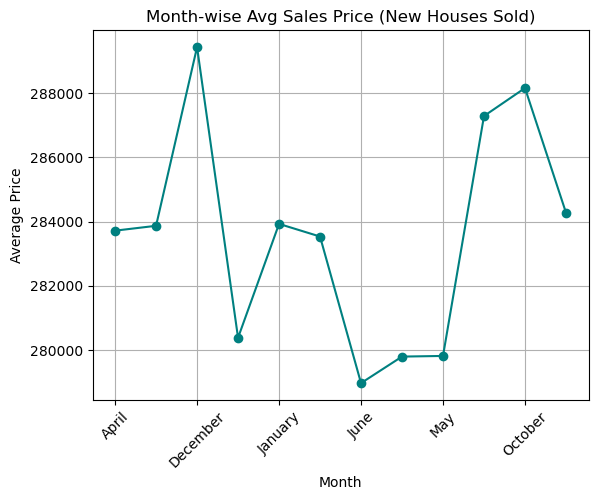

In [16]:
df['Month'] = df['Date'].dt.month_name()
monthly_avg = df.groupby('Month')['AverageSalesPrice_NewHousesSold'].mean()
monthly_avg.plot(marker='o', color='teal')
plt.title("Month-wise Avg Sales Price (New Houses Sold)")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### From above graphs we can see that in the month of Decemberand october their is rise in buying of new houses. And in the month of June their is great  fall of buying new houses compared to other months.

### 7. Show year-wise average MedianSalesPriceofHousesSold

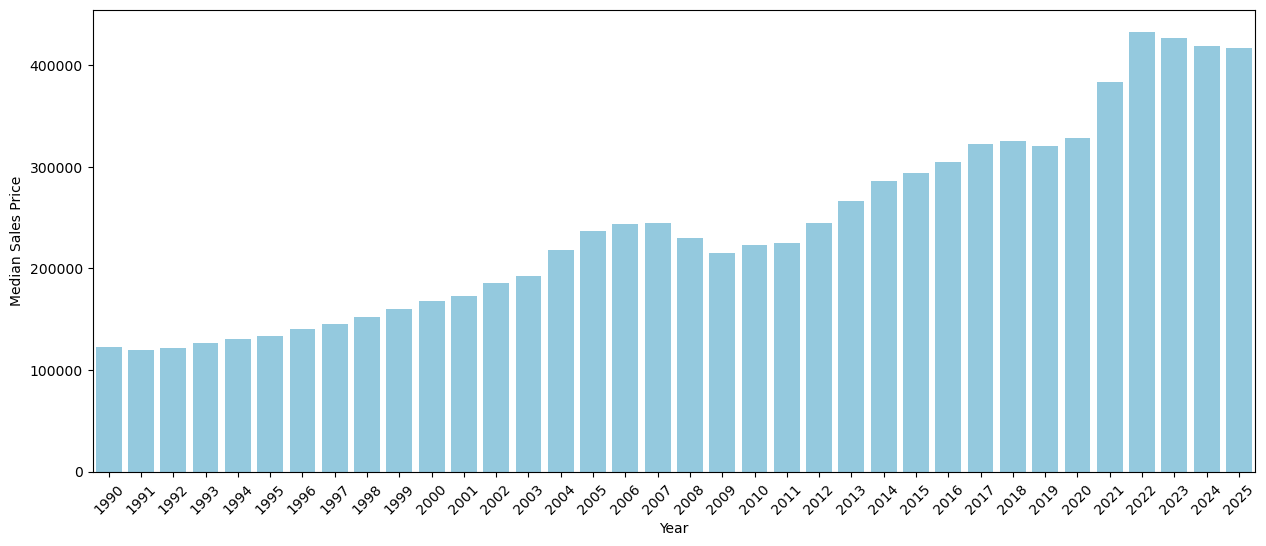

In [18]:
yearly_avg=df.groupby('Year')['MedianSalesPriceofHousesSold'].mean()
plt.figure(figsize=(15, 6))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, color='skyblue')
plt.ylabel("Median Sales Price")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

#### From above graphs we can see that in the year (2012–2022) Prices rebounded and grew sharply, especially post-2020, possibly due to low interest rates and increased housing demand during the pandemic. Slight Decline After 2022: There’s a minor drop in prices in 2023 and 2024, suggesting a cooling market or affordability concerns.

### 8. Calculate and plot the correlation heatmap of all numeric variables

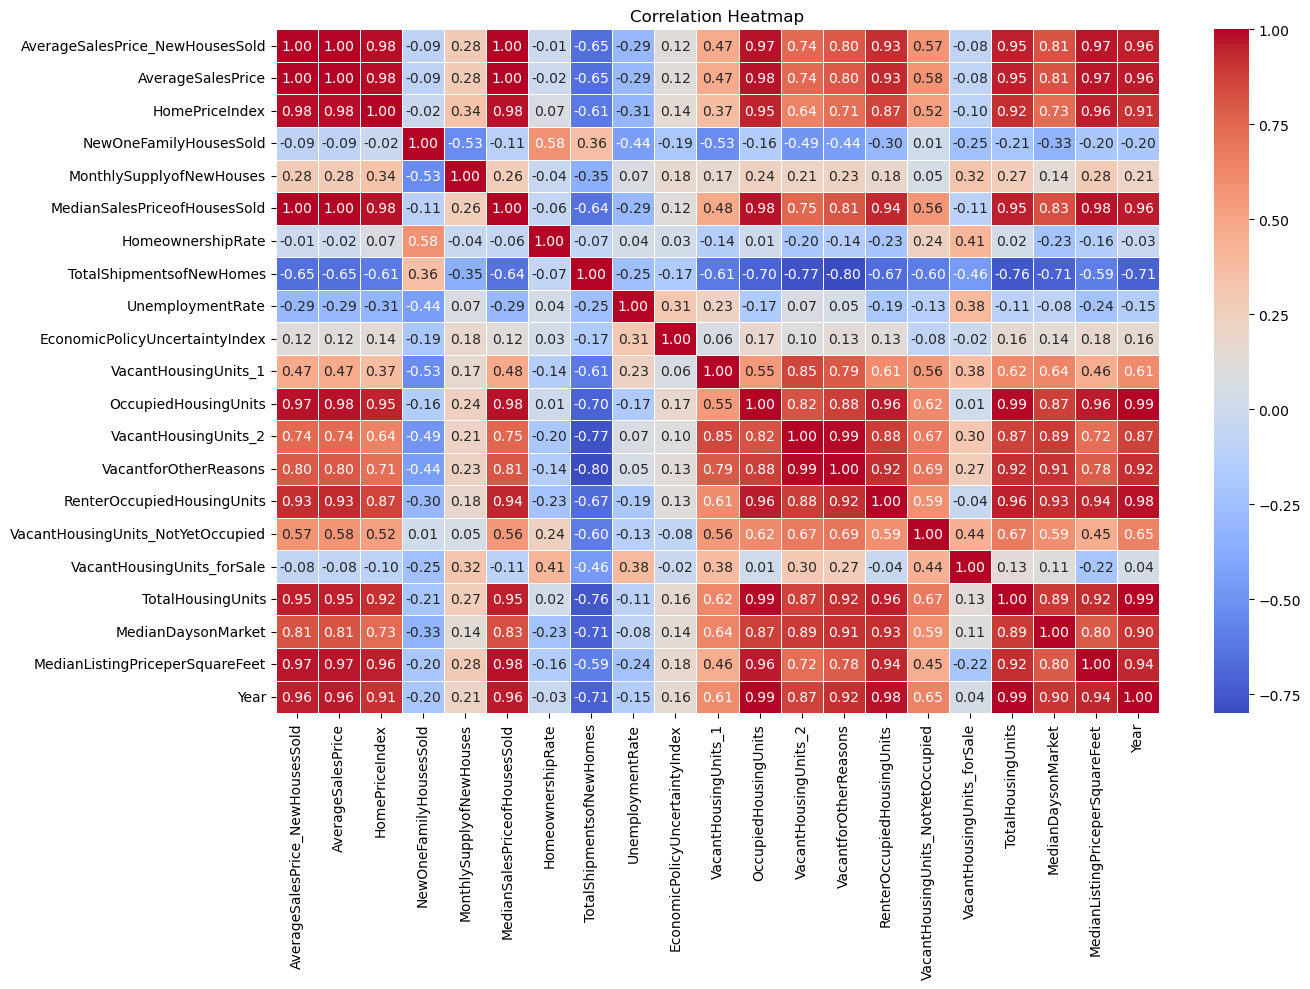

In [19]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm",linewidth=.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

#### AverageSalesPrice is highly correlated with MedianSalesPriceofHousesSold and HomePriceIndex — indicating strong pricing trends.
#### UnemploymentRate shows negative correlation with NewOneFamilyHousesSold — higher unemployment likely reduces house sales.

## 9.Which month had the highest TotalHousingUnits each year?


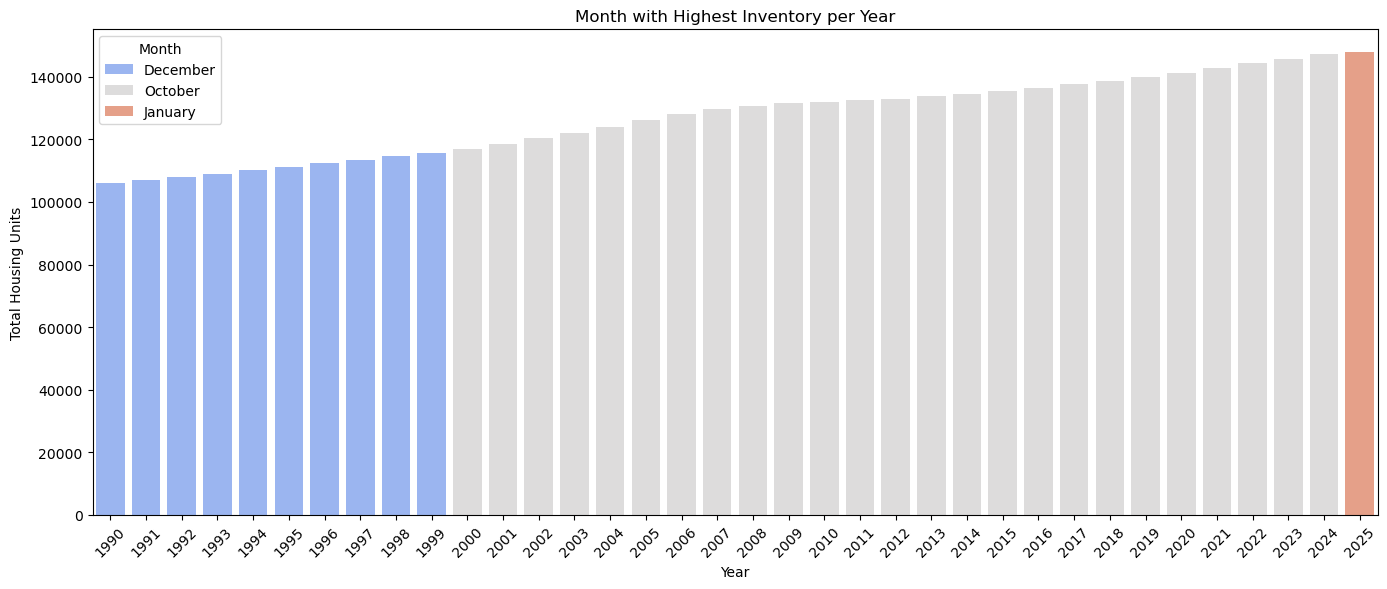

In [20]:
# Extract Year and Month Name from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.strftime('%B')  # e.g., January, February

# Find the month with highest inventory per year
peak_months = df.loc[df.groupby('Year')['TotalHousingUnits'].idxmax(), 
                     ['Year', 'MonthName', 'TotalHousingUnits']]

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=peak_months, x='Year', y='TotalHousingUnits', hue='MonthName', dodge=False, palette='coolwarm')
plt.title("Month with Highest Inventory per Year")
plt.ylabel("Total Housing Units")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend(title="Month")
plt.tight_layout()
plt.show()


### 10. Compare MonthlySupplyofNewHouses vs NewOneFamilyHousesSold using a line plot

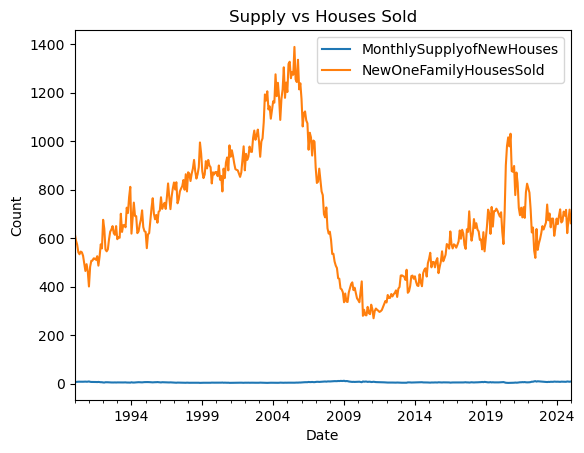

In [21]:
a=df.set_index('Date')[['MonthlySupplyofNewHouses', 'NewOneFamilyHousesSold']]
a.plot(title="Supply vs Houses Sold")
plt.ylabel("Count")
plt.show()

### 11. Create a bar chart showing MedianDaysonMarket by year

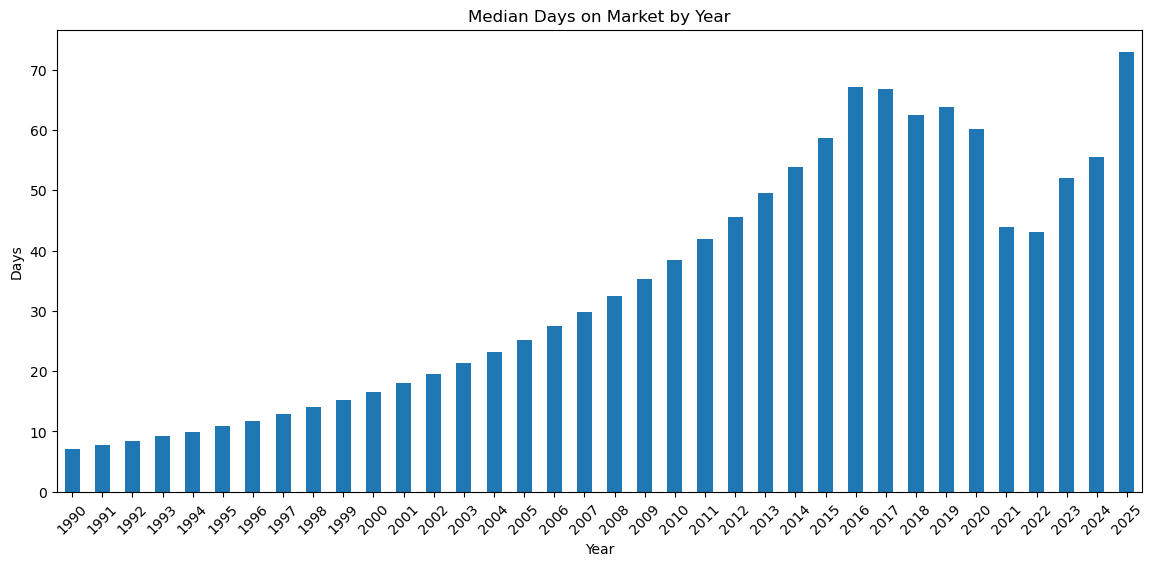

In [22]:
med_year=df.groupby('Year')['MedianDaysonMarket'].mean()
plt.figure(figsize=(14, 6))
med_year.plot(kind='bar', title="Median Days on Market by Year")
plt.ylabel("Days")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

### 12. Find the year with the lowest and highest HomeownershipRate

In [23]:
min_rate = df.loc[df['HomeownershipRate'].idxmin(), ['Year', 'HomeownershipRate']]
max_rate = df.loc[df['HomeownershipRate'].idxmax(), ['Year', 'HomeownershipRate']]
print("\nMin HomeownershipRate:", min_rate)
print("Max HomeownershipRate:", max_rate)



Min HomeownershipRate: Year                 2016
HomeownershipRate    62.9
Name: 315, dtype: object
Max HomeownershipRate: Year                 2004
HomeownershipRate    69.2
Name: 171, dtype: object


### 13.Group by year and plot the average UnemploymentRate

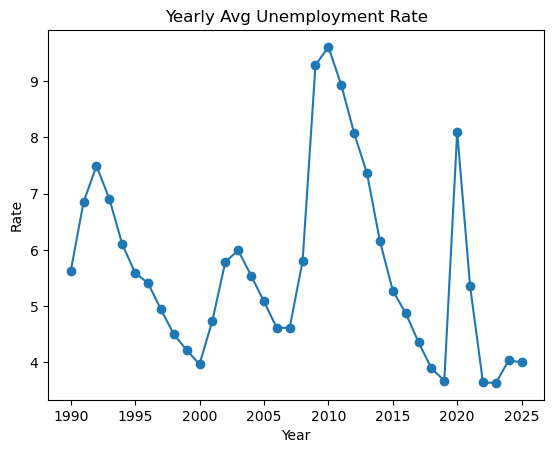

In [24]:
df.groupby('Year')['UnemploymentRate'].mean().plot(marker='o', title="Yearly Avg Unemployment Rate")
plt.ylabel("Rate")
plt.xlabel("Year")
plt.show()

### 14. Calculate the average MedianListingPriceperSquareFeet over time and visualize the trend

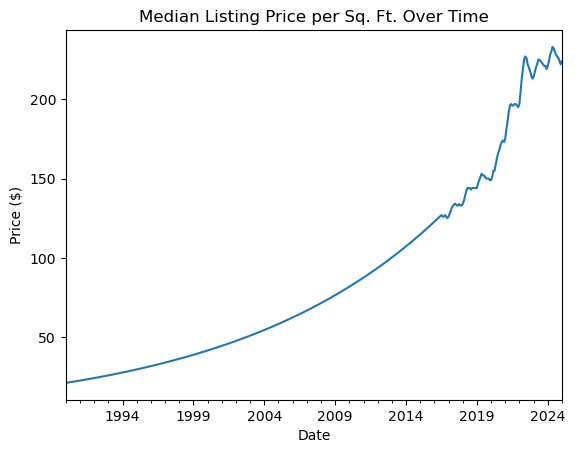

In [25]:
df.set_index('Date')['MedianListingPriceperSquareFeet'].plot(title="Median Listing Price per Sq. Ft. Over Time")
plt.ylabel("Price ($)")
plt.show()

### 15.Is there any seasonality in VacantHousingUnits_forSale?

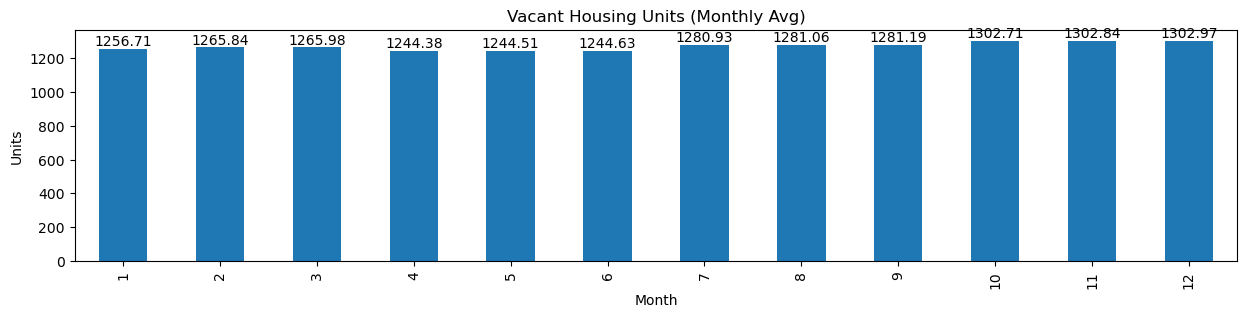

In [26]:
plt.figure(figsize=(15,3))
a=df.groupby(df['Date'].dt.month)['VacantHousingUnits_forSale'].mean().plot(kind='bar', title="Vacant Housing Units (Monthly Avg)") 
for bars in a.containers:
    a.bar_label(bars)  
plt.ylabel("Units")
plt.xlabel("Month")
plt.show()

### 16. Lag analysis: UnemploymentRate vs NewOneFamilyHousesSold

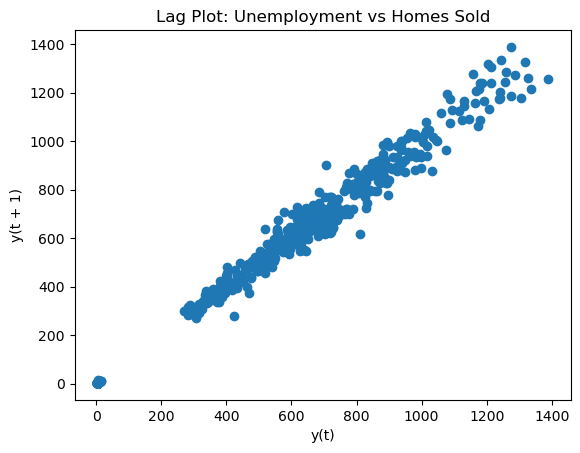

In [27]:
from pandas.plotting import lag_plot
lag_plot(df[['UnemploymentRate', 'NewOneFamilyHousesSold']])
plt.title("Lag Plot: Unemployment vs Homes Sold")
plt.show()

### 17. Month-over-month percentage change in HomePriceIndex

In [28]:
df['HomePriceIndex_PctChange'] = df['HomePriceIndex'].pct_change() * 100
print("\nMonth-over-month % change in HomePriceIndex:\n", df[['Date', 'HomePriceIndex_PctChange']].head())


Month-over-month % change in HomePriceIndex:
         Date  HomePriceIndex_PctChange
0 1990-01-01                       NaN
1 1990-02-01                  0.078404
2 1990-03-01                  0.265058
3 1990-04-01                  0.322959
4 1990-05-01                  0.334900


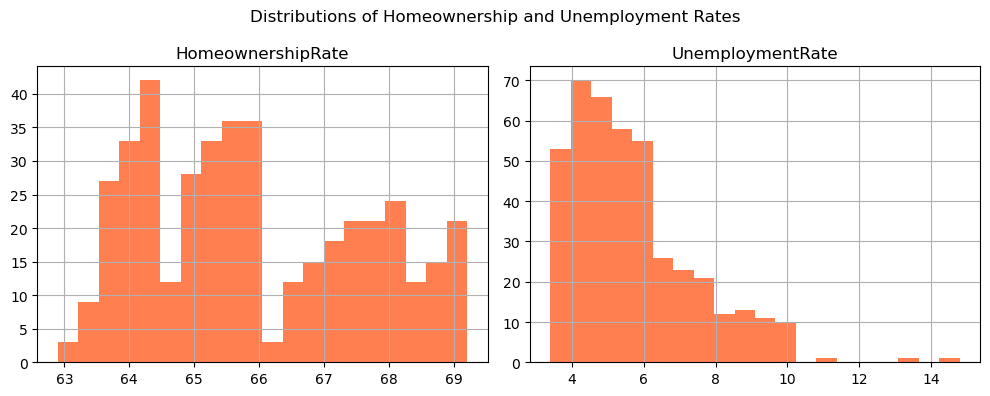

In [29]:
# Q20. Histogram visualization
cols = ['HomeownershipRate', 'UnemploymentRate']
df[cols].hist(bins=20, figsize=(10,4), layout=(1,2), color='coral')
plt.suptitle("Distributions of Homeownership and Unemployment Rates")
plt.tight_layout()

<Axes: xlabel='HomePriceIndex', ylabel='MedianSalesPriceofHousesSold'>

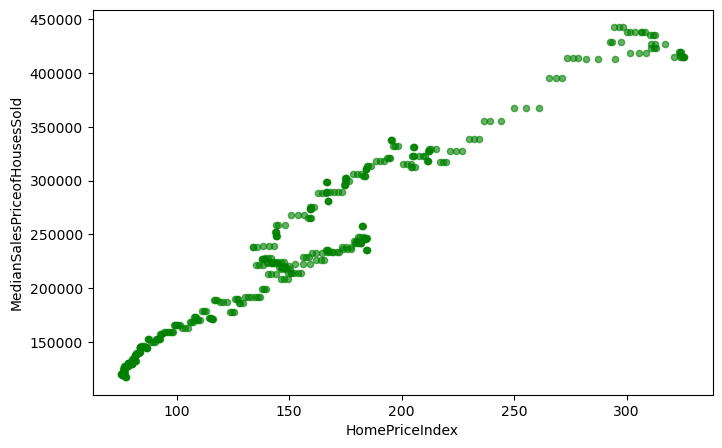

In [30]:
# Q21. Scatter plot of HomePriceIndex vs MedianSalesPriceofHousesSold
df.plot.scatter(x='HomePriceIndex', y='MedianSalesPriceofHousesSold', alpha=0.6, figsize=(8,5), color='green')


In [31]:
Q1 = df['VacantHousingUnits_1'].quantile(0.25)
Q3 = df['VacantHousingUnits_1'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['VacantHousingUnits_1'] < (Q1 - 1.5 * IQR)) | (df['VacantHousingUnits_1'] > (Q3 + 1.5 * IQR))]
len(outliers)

6

<Axes: title={'center': 'Monthly Median of AvgSalesPrice_NewHousesSold'}, xlabel='Month'>

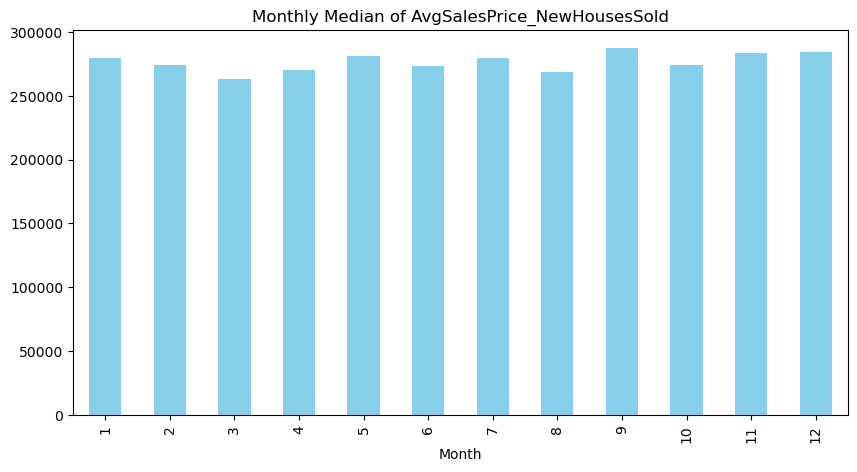

In [33]:
# Q16. Monthly Median `AverageSalesPrice_NewHousesSold` (across years)
monthly_median = df.groupby('Month')['AverageSalesPrice_NewHousesSold'].median()
monthly_median.plot(kind='bar', title='Monthly Median of AvgSalesPrice_NewHousesSold', figsize=(10,5), color='skyblue')

<Axes: title={'center': '12-Month Rolling Average Sales Price'}>

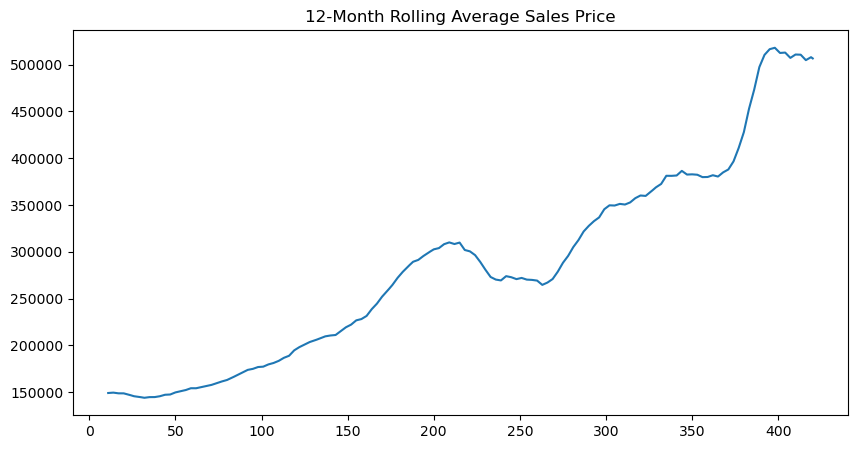

In [34]:
# Q11. Plot a 12-month rolling average for AverageSalesPrice.
df['AverageSalesPrice'].rolling(window=12).mean().plot(title='12-Month Rolling Average Sales Price', figsize=(10,5))


<Axes: title={'center': 'Average Sales Price Over Time'}>

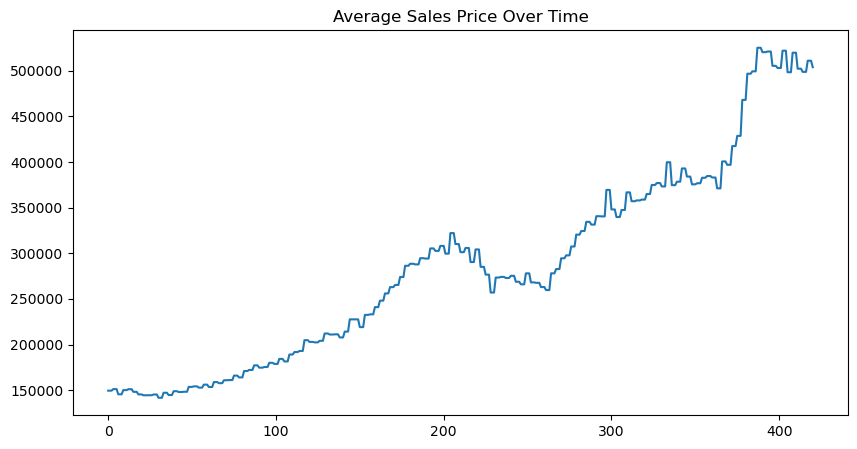

In [35]:
# Q7. Plot the time series of AverageSalesPrice.
df['AverageSalesPrice'].plot(title='Average Sales Price Over Time', figsize=(10,5))